In [8]:
import matplotlib.pyplot as plt
import cv2
import os
from doctr.models import detection_predictor
import numpy as np
from copy import deepcopy
from typing import List
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
import sys

sys.path.append("..")
from lines_segmentation.binarization import binarize

In [9]:
model = detection_predictor(arch='db_resnet50', pretrained=True).eval()

def get_bboxes(img_path: str) -> List[tuple]:
    img = cv2.imread(img_path)
    out = model([img])
    h, w, _ = img.shape
    bboxes = [(int(box[0] * w), int(box[1] * h), int(box[2] * w), int(box[3] * h)) for box in out[0]]
    return bboxes

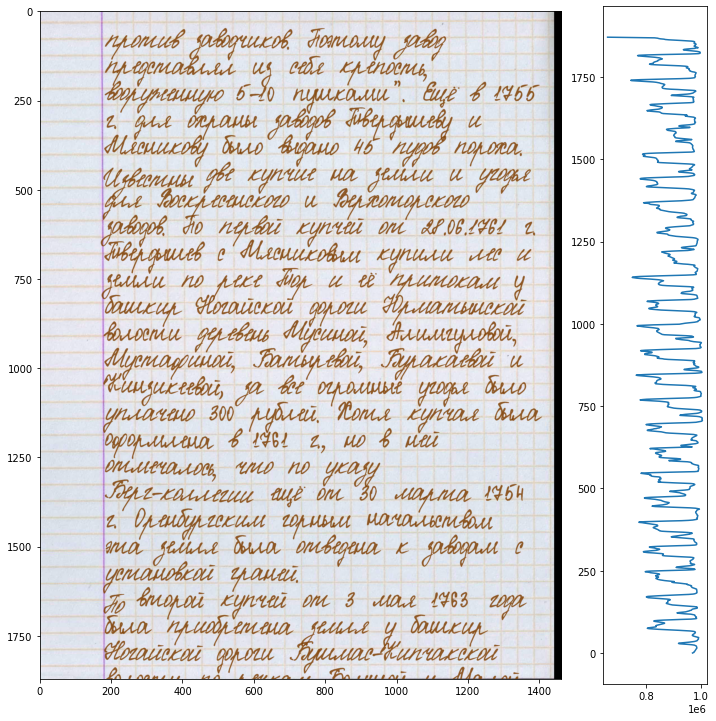

In [11]:
img = cv2.imread("../data/lines_detection/1.png")

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]})
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout()

ax[0].imshow(img)
projection = img.sum(axis=1).sum(axis=1)
ax[1].plot(projection,range(len(projection)))

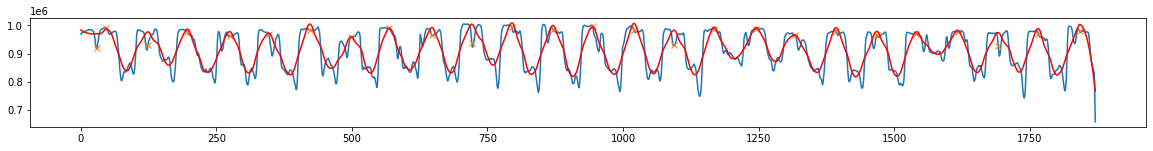

In [12]:
x = projection
xhat = savgol_filter(x, 61, 3)
peaks, _ = find_peaks(xhat, height=0)
plt.figure(figsize=(20, 2))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(xhat, color='red')
plt.show()

In [13]:
def visualise_separators(img_path: str):
    bboxes = get_bboxes(img_path)

    max_x = max([bbox[2] for bbox in bboxes])
    min_x = min([bbox[0] for bbox in bboxes])
    max_y = max([bbox[3] for bbox in bboxes])
    min_y = min([bbox[1] for bbox in bboxes])
    img = cv2.imread(img_path)

    img = img[min_y:max_y, min_x:max_x]
    img = binarize(img)
    projection = img.sum(axis=1).sum(axis=1)
    projection_smoothed = savgol_filter(projection, 70, 3)
    projection_smoothed = savgol_filter(projection_smoothed, 140, 3)
    peaks, _ = find_peaks(projection_smoothed, height=0)
    img_with_lines = deepcopy(img)
    for idx in peaks:
        cv2.line(img_with_lines, (0, idx), (img_with_lines.shape[1], idx), (255, 0, 0))

    for bbox in bboxes:
        img_with_lines = cv2.rectangle(img_with_lines, (bbox[0] - min_x, bbox[1] - min_y), (bbox[2] - min_x, bbox[3] - min_y), (0, 255, 0), 2)
    fig, ax = plt.subplots(2, 1)
    fig.set_figheight(15)
    fig.set_figwidth(15)

    ax[0].imshow(img_with_lines)
    ax[1].plot(projection)
    ax[1].plot(projection_smoothed, color='red')

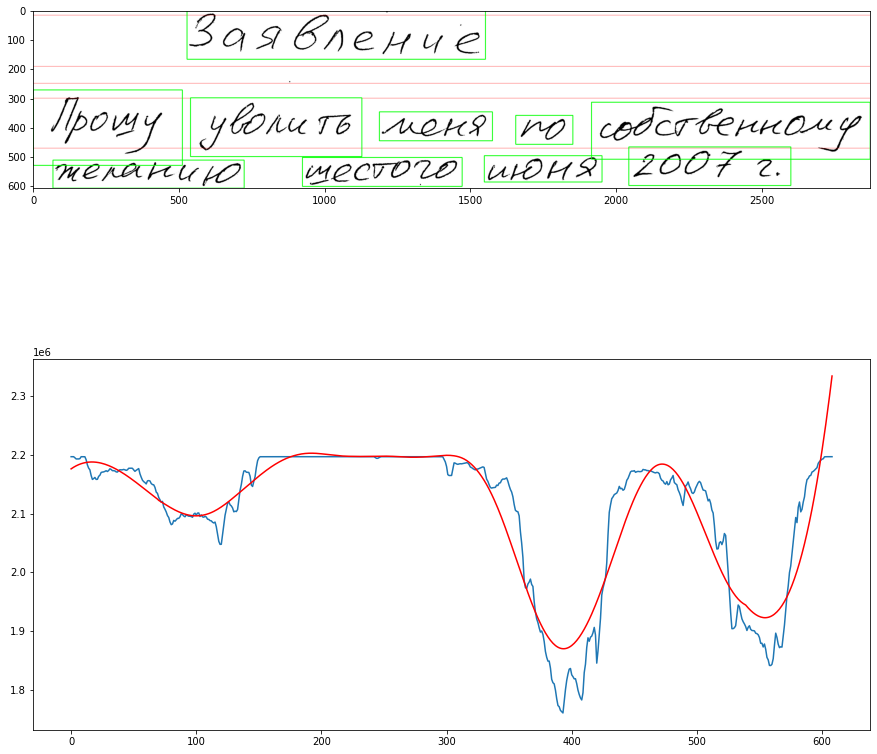

In [14]:
visualise_separators("../data/lising/IMG_20220425_143639.jpg")

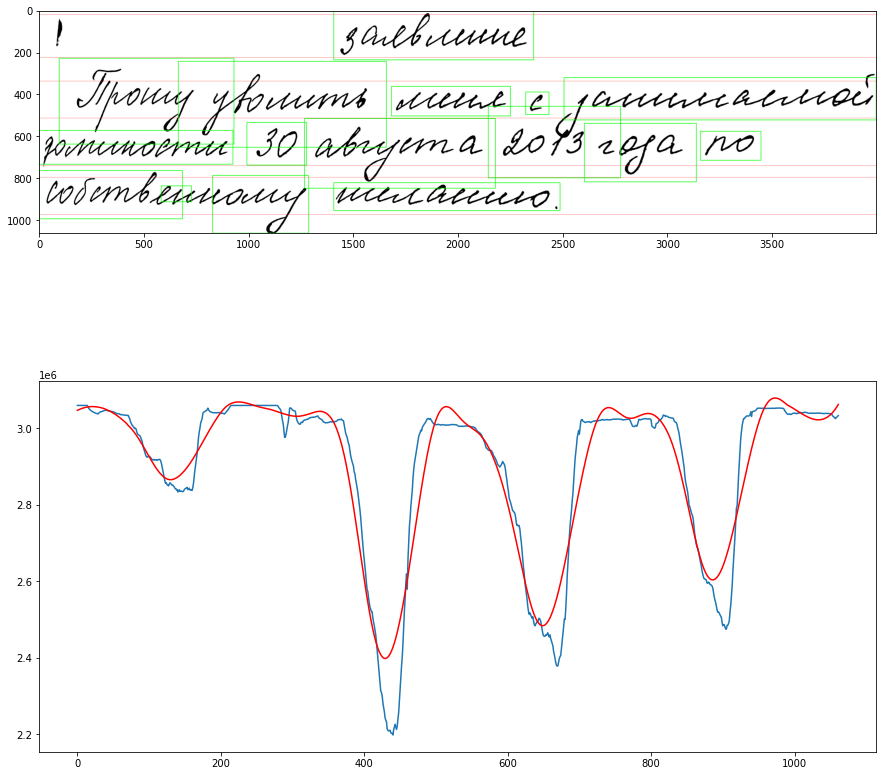

In [15]:
visualise_separators("../data/IMG_20220425_125447_rotated.jpg")

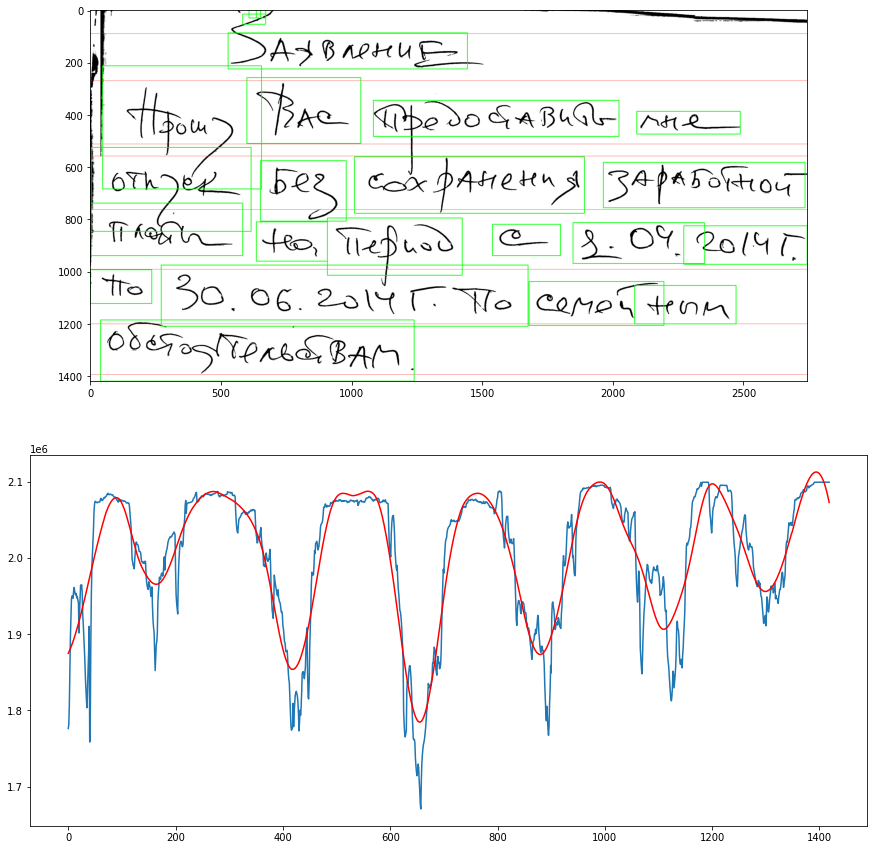

In [16]:
visualise_separators("../data/lines_detection/IMG_20220425_125143.jpg")

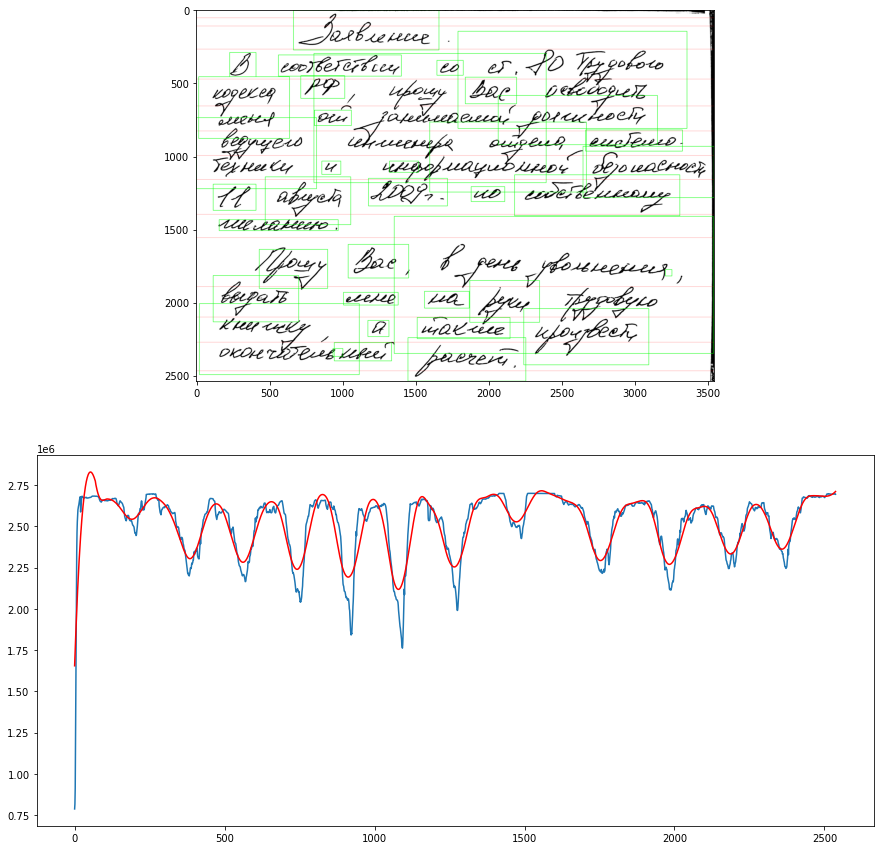

In [17]:
visualise_separators("../data/lines_detection/IMG_20220425_131910.jpg")